# Fitting a Straight Line to Data
Before we start discussing linear regression more formally as a statistical model, it is worthwhile spending some time gaining intuition about what a linear regression model is trying to achieve. For some of you, linear regression will be familiar and this will largely be revision. However, even if you already feel confident about this, it is worth reading through this section to make sure all the basic are understood before we progress. If this is unfamiliar, or if you do not feel confident, make sure you take your time working through this section before we start formalising things later in this lesson.

## Describing a Relationship with a Line
As explained last week, one of the main reasons for modelling data is to *simplify* the complex relationships between variables. If we can express these relationships in a simple form then we can reduce all the information across $n$ measurements of $k$ variables into just a handful of numbers. Those numbers can then be used to both *explain* the process that generated the data, as well as allowing for *prediction* of unmeasured values.

In many real-world cases, the simplest relationship we can define is given by a *straight line*. As an example, if we again use the `mtcars` data and plot `wt` against `mpg`, we have the pattern shown below.

In [2]:
options(repr.plot.width=12, repr.plot.height=7)

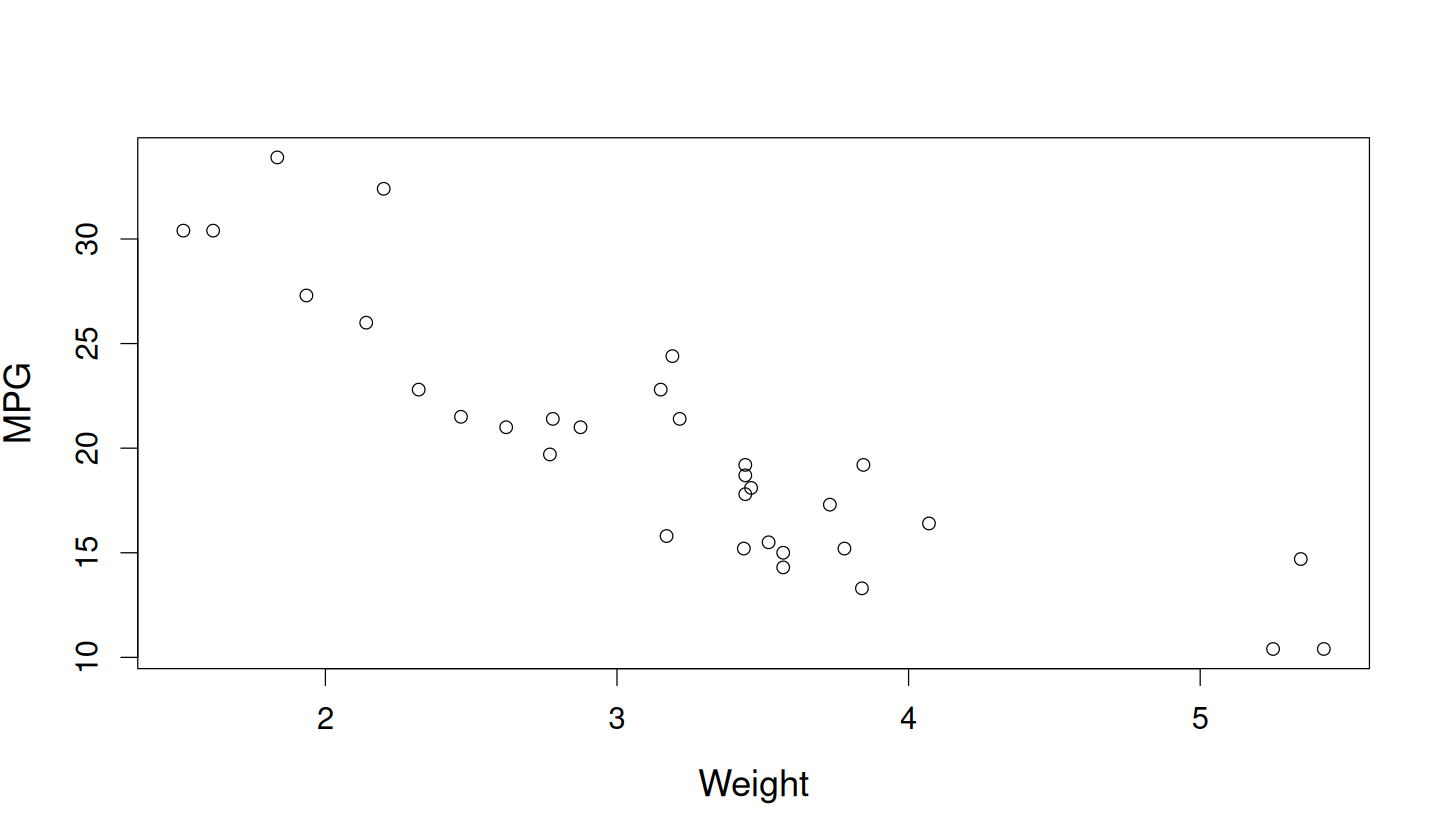

In [3]:
data(mtcars)
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=mtcars$wt, y=mtcars$mpg, xlab="Weight", ylab="MPG")

As `wt` increases there is clear *decrease* in the value of `mpg`. Although the relationship is not perfect, we could probably do a fairly good job of capturing this by simply drawing a line through the cloud of the datapoints. Although this line may only intersect a few of the measured datapoints, the hope would be that it, in some sense, captures the *general pattern* that we can see in the data.

An example of such a line is shown below. For the moment, do not worry about how this has been defined or the numbers that have been used. The main point is just gaining intuition for *why* we would want to do this.

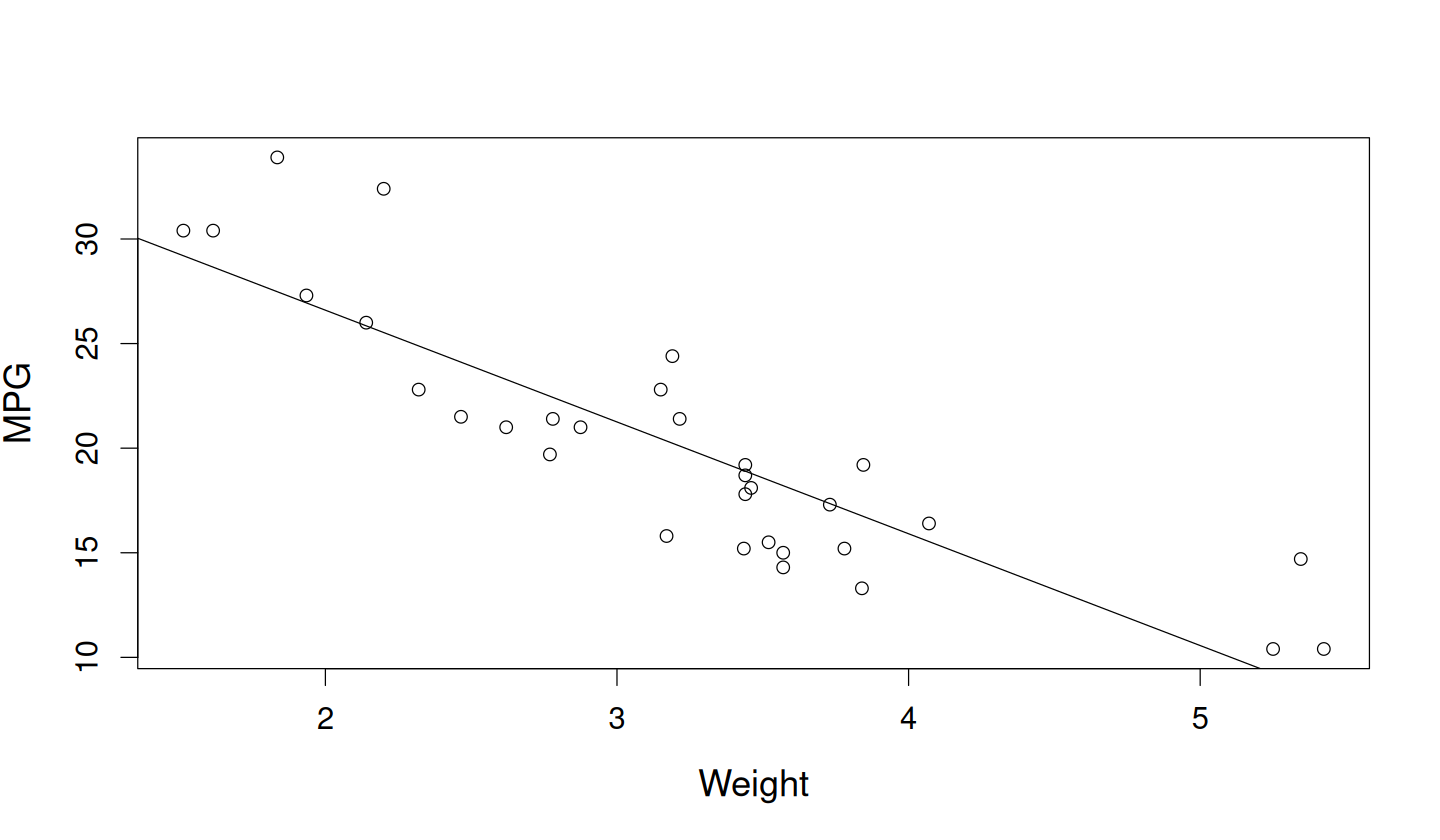

In [6]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=mtcars$wt, y=mtcars$mpg, xlab="Weight", ylab="MPG")
abline(coef=c(37.2851,-5.3445))

So this line does a good job of capturing the general pattern we can see in the data. As a means of summarising what we see in the data, the line does a pretty good job of intersection certain measurements, whereas others are further away from the line. Neverthless, in a very general sense, this seems a reasonable summary that captures the essence of the fact that as weight increases, the MPG decreases. Furthermore, there are points on this line that have no corresponding data (e.g. between `wt` measurements of 4 and 5). As such, these elements of the line represent a *prediction* about what value of MPG we would expect for those values of weight. 

## The Straight Line Equation
In order to fully appreciate how a straight-line provides a *simplification* of the data, we need to examine how a straight-line is defined mathematically. The classic algebraic expression of a line is

$$
y = mx + b,
$$

where $x$ and $y$ have their usual interpretations, $m$ is the *slope* of the line and $b$ is the *intercept*. For our `mtcars` example, this would be

$$
\text{MPG} = m \times \text{Weight} + b.
$$

Understanding this equation can be made more simple by conceptualising it as instructions for how far to climb up the $y$-axis, after walking a certain distance along the $x$-axis. We always start our walk from an $x$-value of 0. The intercept, $b$, tells us how far we need to climb up $y$ before we start walking. For the line shown above, we start from a $y$-value of $b = 37.2851$. So we need to climb all the way up to a value of $37.2851$ before we start. The slope then tells us how far we would need to climb up $y$ if we take *one step* along the $x$-axis. For the line shown above, we had $m = -5.3445$. So, if we move along the $x$-axis by one unit of `wt`, then we need to move *down* the $y$-axis by $5.3445$. For any other distance, we can simply multiply how far we are walking by the value of $m$. For instance, if we walked 2-units along $x$ we would have $m \times 2 = -10.689$, whereas if we move only half a unit we would have $m \times 0.5 = -2.6723$. 

Given the information above, knowing the $y$-value of a line only depends upon 3 pieces of information: the *intercept* (our starting point), the *slope* (how $y$ changes for a single unit change in $x$) and $x$ (how far we are actually walking). In the context of our example, we already know the value for $x$ as these are the values of the `wt` variable. As such, there are only *two* unknowns here. Importantly, once we have values for both the intercept and slope we have effectively reduced all the information in the data to *two numbers*. For the `mtcars` example, we have therefore gone from 32 values of `mpg` and 32 values of `wt` to only 2 numbers. Hopefully it is clear how a straight-line allows for a dramatic simplification of our data. 

## Finding the "Best" Line